In [3]:
import pandas as pd
import json
import glob
from functools import reduce

pd.options.display.max_columns = None

In [68]:
#Get the file names from data folder
all_files = glob.glob('data' + '/*.csv.gz')

column_order = ['neighbourhood_cleansed', 'room_type', '2018 Nov', '2018 Dec', '2019 Jan', '2019 Feb', '2019 Mar',
                '2019 Apr', '2019 May', '2019 Jun', '2019 Jul', '2019 Aug', '2019 Sep', '2019 Oct',
                '2019 Nov', '2019 Dec', '2020 Jan', '2020 Feb', '2020 Mar', '2020 Apr', '2020 May',
                '2020 Jun', '2020 Jul', '2020 Aug', '2020 Sep', '2020 Oct']

#We only consider private rooms and entire homes as other room types are rare
revenue_dfs = []
price_dfs = []
occupancy_dfs = []
count_dfs = []

for filename in all_files: 
    print(filename)
    df = pd.read_csv(filename, compression='gzip')
    #Convert price to int datatype
    df.price.replace('[\$\,]', '', regex=True, inplace = True)
    df['price'] = df['price'].astype(float)
    df['price_per_accommodate'] = (df['price'] / df['accommodates']).round(decimals=2)
    #Occupancy of the last 30 days
    df['occupancy'] = 30 - df['availability_30']
    #Revenue of the last 30 days
    df['revenue'] = df['price_per_accommodate'] * df['occupancy']
    #Original dataframs are too large, so we only keep the features we want
    df = df[['id', 'neighbourhood_cleansed', 'longitude', 'latitude', 'room_type', 'price_per_accommodate', 'occupancy', 'revenue']]
    #Most of the properties with very high price (>$250/person) or occupanc=30 cannot be booked all the time, we consider them as noises and dicided to eliminate them
    df = df.loc[(df['price_per_accommodate'] <= 250) & (df['occupancy'] < 30)]
    #seperate dataframe by private room and entire room
    df = df.loc[(df['room_type'] == 'Private room') | (df['room_type'] == 'Entire home/apt')]
    #Write the cleaned dataframe
    df.to_csv('data_cleaned'+filename[4:], index = False, compression='gzip')
    #Average price, occupancy and revenue of each room type by neighbours of the last 30 days
    df_price = df.groupby(['room_type', 'neighbourhood_cleansed'])['price_per_accommodate'].mean().round(decimals=2).reset_index(name = filename[14:22])
    df_revenue = df.groupby(['room_type', 'neighbourhood_cleansed'])['revenue'].mean().round(decimals=2).reset_index(name = filename[14:22])
    df_occupancy = df.groupby(['room_type', 'neighbourhood_cleansed'])['occupancy'].mean().round(decimals=2).reset_index(name = filename[14:22])
    df_count = df.groupby(['room_type', 'neighbourhood_cleansed']).size().reset_index(name = filename[14:22])
    #Average price, occupancy and revenue of both room types
    df[['room_type']] = 'Both'
    df_both_price = df.groupby(['room_type', 'neighbourhood_cleansed'])['price_per_accommodate'].mean().round(decimals=2).reset_index(name = filename[14:22])
    df_both_revenue = df.groupby(['room_type', 'neighbourhood_cleansed'])['revenue'].mean().round(decimals=2).reset_index(name = filename[14:22])
    df_both_occupancy = df.groupby(['room_type', 'neighbourhood_cleansed'])['occupancy'].mean().round(decimals=2).reset_index(name = filename[14:22])
    df_both_count = df.groupby(['room_type', 'neighbourhood_cleansed']).size().reset_index(name = filename[14:22])
    #Concat dataframe of seperate room type average with both room types average
    df_price = pd.concat([df_price, df_both_price])
    df_revenue = pd.concat([df_revenue, df_both_revenue])
    df_occupancy = pd.concat([df_occupancy, df_both_occupancy])
    df_count = pd.concat([df_count, df_both_count])
    price_dfs.append(df_price)
    revenue_dfs.append(df_revenue)
    occupancy_dfs.append(df_occupancy)
    count_dfs.append(df_count)
    
df_price = reduce(lambda left,right: pd.merge(left,right,on=['room_type', 'neighbourhood_cleansed'], how='outer'), price_dfs)
df_price = df_price[column_order].fillna(0)

df_revenue = reduce(lambda left,right: pd.merge(left,right,on=['room_type', 'neighbourhood_cleansed'], how='outer'), revenue_dfs)
df_revenue = df_revenue[column_order].fillna(0)

df_occupancy = reduce(lambda left,right: pd.merge(left,right,on=['room_type', 'neighbourhood_cleansed'], how='outer'), occupancy_dfs)
df_occupancy = df_occupancy[column_order].fillna(0)

df_count = reduce(lambda left,right: pd.merge(left,right,on=['room_type', 'neighbourhood_cleansed'], how='outer'), count_dfs)
df_count = df_count[column_order].fillna(0)

data\listings 2018 Dec.csv.gz
data\listings 2018 Nov.csv.gz
data\listings 2019 Apr.csv.gz
data\listings 2019 Aug.csv.gz
data\listings 2019 Dec.csv.gz
data\listings 2019 Feb.csv.gz
data\listings 2019 Jan.csv.gz
data\listings 2019 Jul.csv.gz
data\listings 2019 Jun.csv.gz
data\listings 2019 Mar.csv.gz
data\listings 2019 May.csv.gz
data\listings 2019 Nov.csv.gz
data\listings 2019 Oct.csv.gz
data\listings 2019 Sep.csv.gz
data\listings 2020 Apr.csv.gz
data\listings 2020 Aug.csv.gz
data\listings 2020 Feb.csv.gz
data\listings 2020 Jan.csv.gz
data\listings 2020 Jul.csv.gz
data\listings 2020 Jun.csv.gz
data\listings 2020 Mar.csv.gz
data\listings 2020 May.csv.gz
data\listings 2020 Oct.csv.gz
data\listings 2020 Sep.csv.gz


In [69]:
df_price.to_csv('data_cleaned/price.csv.gz', index = False, compression = 'gzip')
df_revenue.to_csv('data_cleaned/revenue.csv.gz', index = False, compression = 'gzip')
df_occupancy.to_csv('data_cleaned/occupancy.csv.gz', index = False, compression = 'gzip')
df_count.to_csv('data_cleaned/count.csv.gz', index = False, compression = 'gzip')

# 分割綫------------------------

In [10]:
import re
import fnmatch
[dic[key] for key in dic.keys() if fnmatch.fnmatch(key, '*dec')]

[1, 2]

In [19]:
df = pd.read_csv(filename, compression='gzip')
df.price.replace('[\$\,]', '', regex=True, inplace = True)
df['price'] = df['price'].astype(float)
df['price_per_accommodate'] = df['price'] / df['accommodates']
PR_price = df.groupby(['room_type', 'neighbourhood_cleansed'])['price_per_accommodate'].mean().round(decimals=2).reset_index(name = filename[14:22])
PR_price.head()

,room_type,neighbourhood_cleansed,2020 sep
0,Entire home/apt,Agincourt North,23.12
1,Entire home/apt,Agincourt South-Malvern West,28.85
2,Entire home/apt,Alderwood,34.50
3,Entire home/apt,Annex,61.49
4,Entire home/apt,Banbury-Don Mills,39.73


In [17]:
PR_price.head()

,price_per_accommodate
neighbourhood_cleansed,
Agincourt North,33.00
Agincourt South-Malvern West,37.72
Alderwood,36.00
Annex,58.56
Banbury-Don Mills,46.55


In [27]:
df = pd.read_csv(filename, compression='gzip')
df = df.loc[(df['room_type'] == 'Private room') | (df['room_type'] == 'Entire home/apt')]

In [41]:
df_dic = {'2018 dec': df_count, '2019 dec': df_price}

In [42]:
df_dic['2018 dec'].head()

,room_type,neighbourhood_cleansed,2020 may,2020 oct,2020 sep
0,Entire home/apt,Agincourt North,6,7,7
1,Entire home/apt,Agincourt South-Malvern West,29,23,21
2,Entire home/apt,Alderwood,20,19,17
3,Entire home/apt,Annex,648,480,485
4,Entire home/apt,Banbury-Don Mills,32,23,25


In [90]:
keys = [key for key in df_dic.keys() if fnmatch.fnmatch(key, '*dec')]
keys

['2018 dec', '2019 dec']

In [43]:
df_dic['revenue'] = df_revenue

In [45]:
df_dic['revenue'].head()

,room_type,neighbourhood_cleansed,2020 may,2020 oct,2020 sep
0,Entire home/apt,Agincourt North,4633.33,5356.57,6308.57
1,Entire home/apt,Agincourt South-Malvern West,1623.48,2366.35,2462.67
2,Entire home/apt,Alderwood,3123.30,3417.11,3278.29
3,Entire home/apt,Annex,4013.28,4570.36,4278.88
4,Entire home/apt,Banbury-Don Mills,2354.25,2457.91,2789.51


In [79]:
dff_PR_revenue = df_revenue.loc[(df_revenue['neighbourhood_cleansed'] == 'Alderwood') & (df_revenue['room_type'] == 'Private room')]
dff_EH_revenue = df_revenue.loc[(df_revenue['neighbourhood_cleansed'] == 'Alderwood') & (df_revenue['room_type'] == 'Entire home/apt')]

In [80]:
dff_PR_revenue = dff_PR_revenue.transpose()[2:].reset_index()
dff_PR_revenue.columns = ['time', 'revenue']
dff_EH_revenue = dff_EH_revenue.transpose()[2:].reset_index()
dff_EH_revenue.columns = ['time', 'revenue']

In [84]:
dff_EH_revenue.head()

,time,revenue
0,2018 nov,641.43
1,2018 dec,654.35
2,2019 jan,607.87
3,2019 feb,657.91
4,2019 mar,593.41


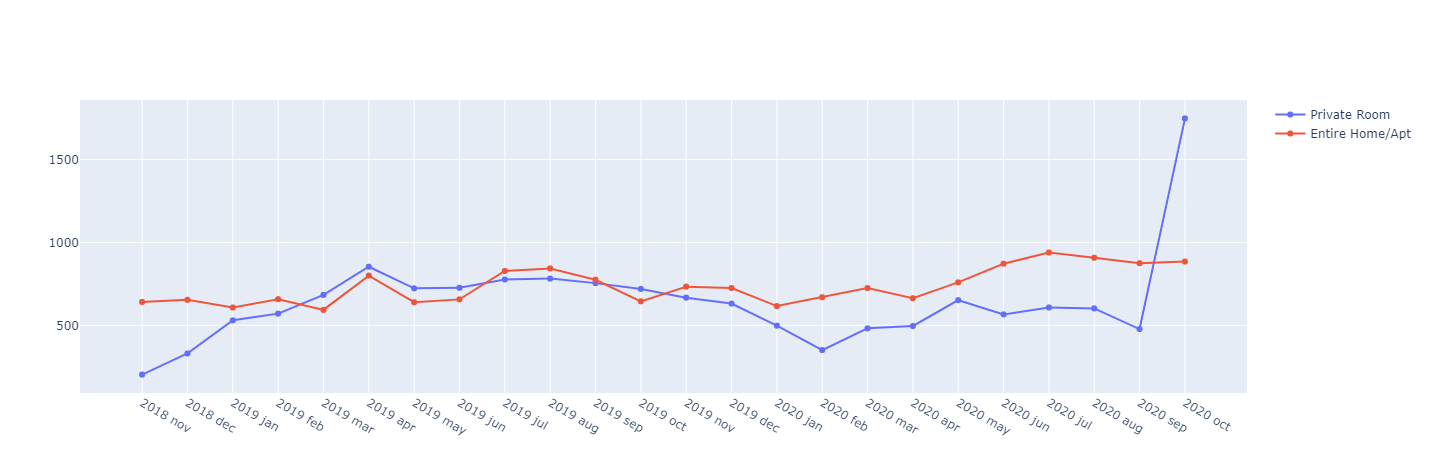

In [86]:
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x=dff_PR_revenue['time'], y=dff_PR_revenue['revenue'],
                           mode='lines+markers', name='Private Room'))
fig.add_trace(go.Scatter(x=dff_EH_revenue['time'], y=dff_EH_revenue['revenue'],
                           mode='lines+markers', name='Entire Home/Apt'))
fig.show()

In [26]:
x = format(1234, '0,.2f')

In [56]:
df_2019_ag = pd.read_csv('data_cleaned\listings 2020 Oct.csv.gz', compression = 'gzip')

In [60]:
df_2019_ag = df_2019_ag.loc[df_2019_ag['neighbourhood_cleansed'] == 'Waterfront Communities-The Island'].sort_values(by = ['occupancy'], ascending = False)

In [61]:
df_2019_ag.head()

,id,neighbourhood_cleansed,longitude,latitude,room_type,price_per_accommodate,occupancy,revenue
14681,40279984,Waterfront Communities-The Island,-79.39757,43.63961,Entire home/apt,250.00,30,7500.0
13446,38076531,Waterfront Communities-The Island,-79.38304,43.64223,Entire home/apt,39.50,30,1185.0
14438,39915278,Waterfront Communities-The Island,-79.38113,43.64310,Private room,39.50,30,1185.0
17843,45501540,Waterfront Communities-The Island,-79.38874,43.64440,Entire home/apt,39.50,30,1185.0
6858,21681649,Waterfront Communities-The Island,-79.39847,43.63788,Entire home/apt,39.67,30,1190.1


In [62]:
df_2019_ag_dirty = pd.read_csv('data\listings 2020 Oct.csv.gz', compression = 'gzip')
df_2019_ag_dirty.loc[df_2019_ag_dirty['id']==38076531]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13798,38076531,https://www.airbnb.com/rooms/38076531,20201009050515,2020-10-24,50TH+ FLOOR NEXT TO UNION STATION @PRIME LOCATION,Welcome to Toronto! Experience the best of Tor...,5mins from union station and metro Toronto con...,https://a0.muscache.com/pictures/f690ce2c-836c...,107497569,https://www.airbnb.com/users/show/107497569,Kevin,2016-12-16,"Toronto, Ontario, Canada","Hello everyone, my name is Kevin. I’m new doin...",within an hour,89%,98%,f,https://a0.muscache.com/im/pictures/user/af8fc...,https://a0.muscache.com/im/pictures/user/af8fc...,Entertainment District,3.0,3.0,"['email', 'phone', 'offline_government_id', 's...",t,t,"Toronto, Ontario, Canada",Waterfront Communities-The Island,NaN,43.64223,-79.38304,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Hangers"", ""Coffee maker"", ""Carbon monoxide a...",$158.00,1,1125,1,2,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2020-10-24,35,23,0,2019-09-08,2020-07-26,91.0,9.0,9.0,9.0,9.0,10.0,9.0,NaN,t,2,2,0,0,2.54
